Imports

In [6]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder


reading from files

In [109]:
excel_file = r"old_data.xlsx"
df = pd.read_excel(excel_file)
output_file = r"balanced_data.xlsx"
df_out =pd.DataFrame()

In [110]:
def classify_nitrogen(nitrogen_value):
    #very low = 0
    if nitrogen_value >= 0 and nitrogen_value <= 17:
        return '0'
     #low = 1
    elif nitrogen_value > 17 and nitrogen_value <= 34:
        return '1'
    #optimal = 2
    elif nitrogen_value > 34 and nitrogen_value <= 51:
        return '2'
    #slightly high = 3
    elif nitrogen_value > 51 and nitrogen_value <= 68:
        return '3'
    #moderately high = 4
    elif nitrogen_value > 68 and nitrogen_value <= 85:
        return '4'
    #high = 5
    elif nitrogen_value > 85 and nitrogen_value <= 102:
        return '5'
    # very high =6
    elif nitrogen_value > 102 and nitrogen_value <= 119:
        return '6'
    #extremely high =7 
    elif nitrogen_value > 119 and nitrogen_value <= 136:
        return '7'
    #overload = 8
    elif nitrogen_value > 136 and nitrogen_value <= 153:
        return '8'
    #toxic = 9s
    elif nitrogen_value > 153 and nitrogen_value <= 255:
        return '9'
    #invalid =10
    else:
        return '10'

In [9]:
df['Nitrogen Classification'] = df['N'].apply(classify_nitrogen)
df.to_excel(excel_file, index=False)

In [111]:
def classify_phosphorus(phosphorus_value):
    #very low = 0
    if phosphorus_value >= 0 and phosphorus_value <= 17:
        return '0'
     # low = 1
    elif phosphorus_value > 17 and phosphorus_value <= 34:
        return '1'
    #moderately low = 2
    elif phosphorus_value > 34 and phosphorus_value <= 51:
        return '2'
    #slightly low = 3
    elif phosphorus_value > 51 and phosphorus_value <= 68:
        return '3'
    #optimal = 4
    elif phosphorus_value > 68 and phosphorus_value <= 85:
        return '4'
    #slightly high = 5
    elif phosphorus_value > 85 and phosphorus_value <= 102:
        return '5'
    #moderately high =6
    elif phosphorus_value > 102 and phosphorus_value <= 119:
        return '6'
    # high =7 
    elif phosphorus_value > 119 and phosphorus_value <= 136:
        return '7'
    #very high = 8
    elif phosphorus_value > 136 and phosphorus_value <= 153:
        return '8'
    #extremely high = 9
    elif phosphorus_value > 153 and phosphorus_value <= 187:
        return '9'
    #toxic high = 10
    else:
        return '10'

In [112]:
df['Phosphorus Classification'] = df['P'].apply(classify_phosphorus)

df.to_excel(excel_file, index=False)
df.head(600)


,N,P,K,Nitrogen Classification,Phosphorus Classification,Potassium Classification,class_label
0,143,69,217,8,4,9,0.0
1,170,36,216,9,2,9,1.0
2,0,66,219,0,3,9,2.0
3,133,45,207,7,2,8,3.0
4,132,48,218,7,2,9,4.0
...,...,...,...,...,...,...,...
594,167,67,231,9,3,9,NaN
595,179,38,71,9,2,4,NaN
596,155,70,163,9,4,7,NaN
597,66,41,167,3,2,7,NaN


In [113]:
def classify_potassium(potassiu_value):
    #very low = 0
    if potassiu_value >= 0 and potassiu_value <= 17:
        return '0'
     # low = 1
    elif potassiu_value > 17 and potassiu_value <= 34:
        return '1'
    #moderately low = 2
    elif potassiu_value > 34 and potassiu_value <= 51:
        return '2'
    #slightly low = 3
    elif potassiu_value > 51 and potassiu_value <= 68:
        return '3'
    #optimal = 4
    elif potassiu_value > 68 and potassiu_value <= 100:
        return '4'
    #slightly high = 5
    elif potassiu_value > 100 and potassiu_value <= 130:
        return '5'
    #moderately high =6
    elif potassiu_value > 130 and potassiu_value <= 150:
        return '6'
    # high =7 
    elif potassiu_value > 150 and potassiu_value <= 190:
        return '7'
    #very high = 8
    elif potassiu_value > 190 and potassiu_value <= 210:
        return '8'
    #extremely high = 9
    elif potassiu_value > 210 and potassiu_value <= 255:
        return '9'
    #toxic high = 10
    else:
        return '10'

In [114]:
df['Potassium Classification'] = df['K'].apply(classify_potassium)

df.to_excel(excel_file, index=False)
df.head(600)

,N,P,K,Nitrogen Classification,Phosphorus Classification,Potassium Classification,class_label
0,143,69,217,8,4,9,0.0
1,170,36,216,9,2,9,1.0
2,0,66,219,0,3,9,2.0
3,133,45,207,7,2,8,3.0
4,132,48,218,7,2,9,4.0
...,...,...,...,...,...,...,...
594,167,67,231,9,3,9,NaN
595,179,38,71,9,2,4,NaN
596,155,70,163,9,4,7,NaN
597,66,41,167,3,2,7,NaN


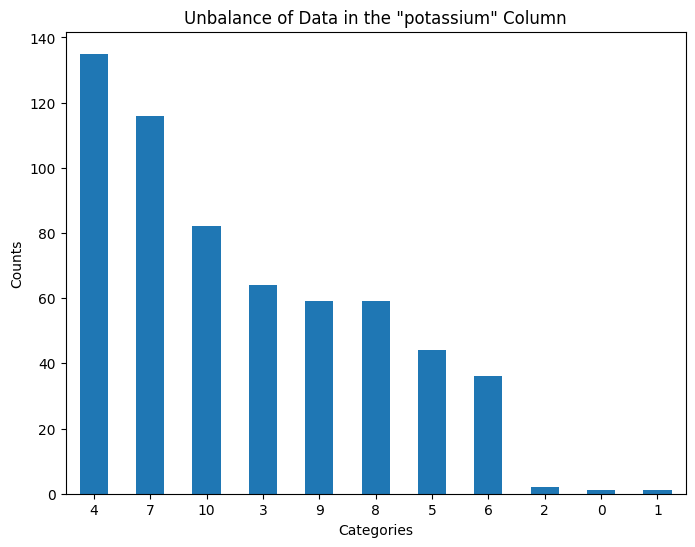

In [115]:
col_to_plot = 'Potassium Classification'
col_count = df[col_to_plot].value_counts()
plt.figure(figsize=(8, 6))
col_count.plot(kind='bar')
plt.title('Unbalance of Data in the "potassium" Column')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

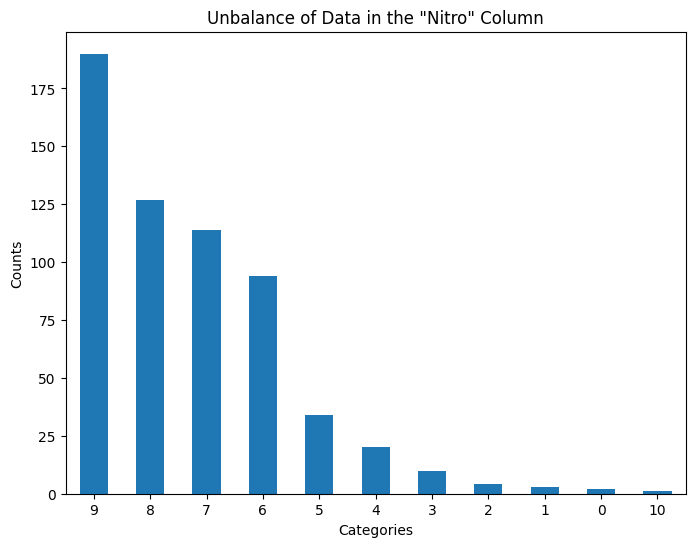

In [116]:
col_to_plot = 'Nitrogen Classification'
col_count = df[col_to_plot].value_counts()
plt.figure(figsize=(8, 6))
col_count.plot(kind='bar')
plt.title('Unbalance of Data in the "Nitro" Column')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()


In [117]:
df_out =pd.DataFrame()
df = pd.read_excel(excel_file)
filt_counts = df['Nitrogen Classification'].value_counts()
class_column = 'class_label'
print("Class distribution before oversampling:")
print(df['Nitrogen Classification'].value_counts())
filt_counts = df[class_column].value_counts()
# Separate features and labels
X = df.drop(columns=[class_column])
y = df['Nitrogen Classification']
sampling_strategy = {0:230,1:230,2:230,3:230,4:230,5:230,6:230,7:230,8:230,9:230,10:230}
# Apply RandomOverSampler to balance the dataset
ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_resampled, y_resampled = ros.fit_resample(X, y)
# Combine resampled features and labels into a DataFrame
balanced_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=class_column)], axis=1)
print("\nClass distribution after oversampling:")
print(balanced_df[class_column].value_counts())
df_out = pd.concat([df_out,balanced_df['class_label']], axis=1)
df_out = df_out.rename(columns = {'class_label':'Nitrogen'})
df_out = df_out.sample(frac=1).reset_index(drop=True)
df_out.to_excel(output_file, index=False)

Class distribution before oversampling:
Nitrogen Classification
9     190
8     127
7     114
6      94
5      34
4      20
3      10
2       4
1       3
0       2
10      1
Name: count, dtype: int64

Class distribution after oversampling:
class_label
8     230
9     230
0     230
7     230
10    230
6     230
5     230
4     230
1     230
3     230
2     230
Name: count, dtype: int64


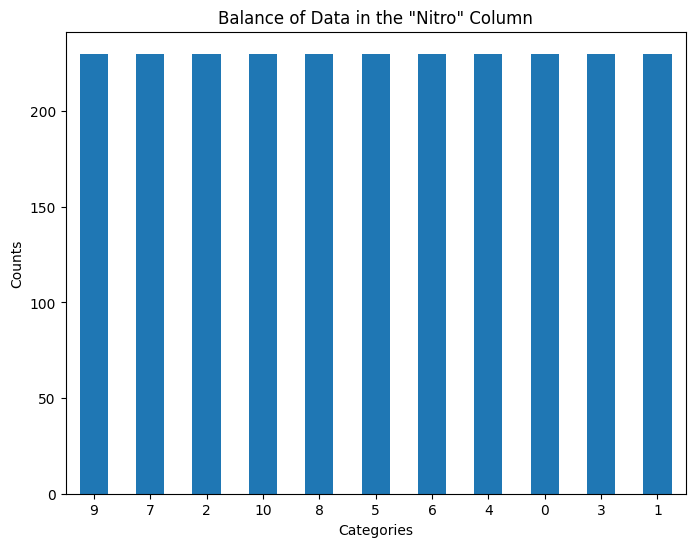

In [118]:
col_to_plot = 'Nitrogen'
col_count = df_out[col_to_plot].value_counts()
plt.figure(figsize=(8, 6))
col_count.plot(kind='bar')
plt.title('Balance of Data in the "Nitro" Column')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()


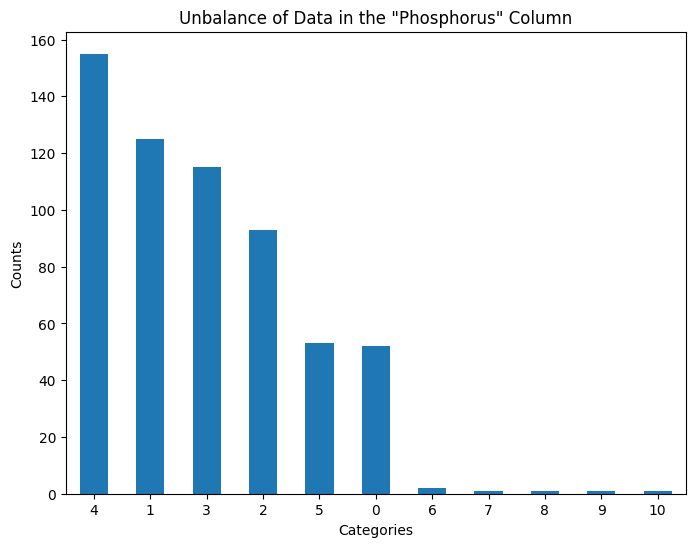

In [119]:
col_to_plot = 'Phosphorus Classification'
col_count = df[col_to_plot].value_counts()
plt.figure(figsize=(8, 6))
col_count.plot(kind='bar')
plt.title('Unbalance of Data in the "Phosphorus" Column')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

In [120]:
print("Class distribution before oversampling:")
print(df['Phosphorus Classification'].value_counts())

filt_counts = df[class_column].value_counts()
# Separate features and labels
X = df.drop(columns=[class_column])
y = df['Phosphorus Classification']
sampling_strategy = {0:230,1:230,2:230,3:230,4:230,5:230,6:230,7:230,8:230,9:230,10:230}
# Apply RandomOverSampler to balance the dataset
ros = RandomOverSampler(sampling_strategy=sampling_strategy )
X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine resampled features and labels into a DataFrame
balanced_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=class_column)], axis=1)

print("\nClass distribution after oversampling:")
print(balanced_df[class_column].value_counts())

df_out = pd.concat([df_out,balanced_df['class_label']], axis=1)
df_out = df_out.rename(columns = {'class_label':'Phosphorus'})

df_out = df_out.sample(frac=1).reset_index(drop=True)
df_out.to_excel(output_file, index=False)

Class distribution before oversampling:
Phosphorus Classification
4     155
1     125
3     115
2      93
5      53
0      52
6       2
7       1
8       1
9       1
10      1
Name: count, dtype: int64

Class distribution after oversampling:
class_label
4     230
2     230
3     230
0     230
1     230
5     230
6     230
7     230
8     230
9     230
10    230
Name: count, dtype: int64


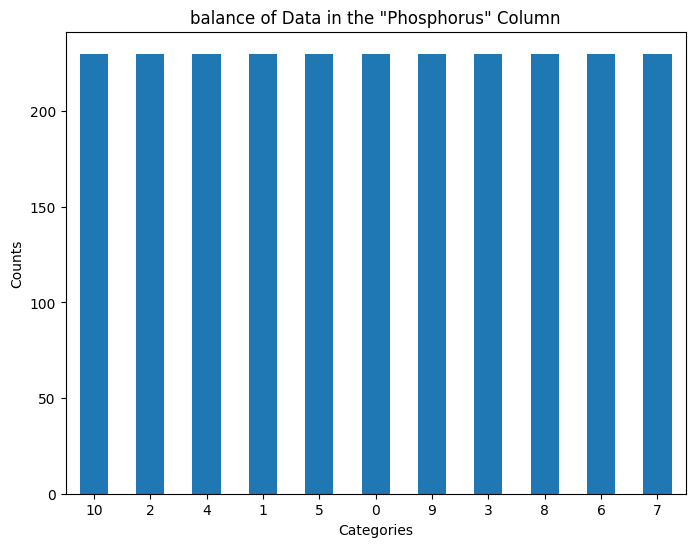

In [121]:
col_to_plot = 'Phosphorus'
col_count = df_out[col_to_plot].value_counts()
plt.figure(figsize=(8, 6))
col_count.plot(kind='bar')
plt.title('balance of Data in the "Phosphorus" Column')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

In [122]:
print("Class distribution before oversampling:")
print(df['Potassium Classification'].value_counts())
class_column = 'class_label'
filt_counts = df[class_column].value_counts()
# Separate features and labels
X = df.drop(columns=[class_column])
y = df['Potassium Classification']
sampling_strategy = {0:230,1:230,2:230,3:230,4:230,5:230,6:230,7:230,8:230,9:230,10:230}
# Apply RandomOverSampler to balance the dataset
ros = RandomOverSampler(sampling_strategy=sampling_strategy )
X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine resampled features and labels into a DataFrame
balanced_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=class_column)], axis=1)

print("\nClass distribution after oversampling:")
print(balanced_df[class_column].value_counts())

df_out = pd.concat([df_out,balanced_df['class_label']], axis=1)
df_out = df_out.rename(columns = {'class_label':'Potassium'})

df_out = df_out.sample(frac=1).reset_index(drop=True)
df_out.to_excel(output_file, index=False)

Class distribution before oversampling:
Potassium Classification
4     135
7     116
10     82
3      64
9      59
8      59
5      44
6      36
2       2
0       1
1       1
Name: count, dtype: int64

Class distribution after oversampling:
class_label
9     230
8     230
7     230
3     230
4     230
6     230
5     230
0     230
1     230
10    230
2     230
Name: count, dtype: int64


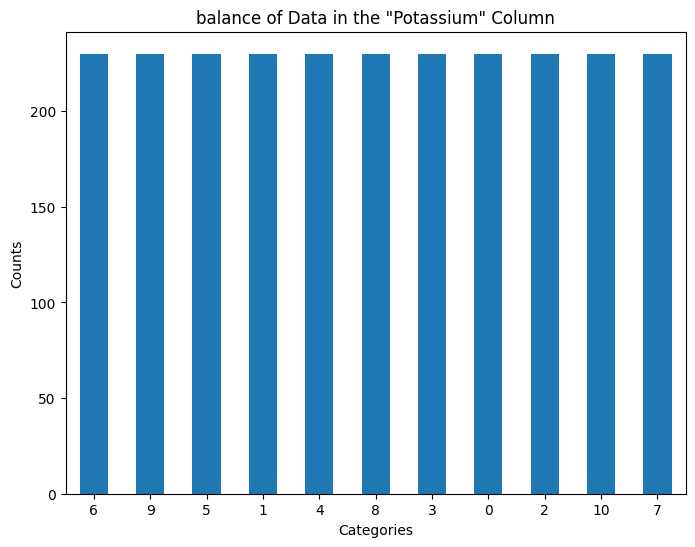

In [123]:
col_to_plot = 'Potassium'
col_count = df_out[col_to_plot].value_counts()
plt.figure(figsize=(8, 6))
col_count.plot(kind='bar')
plt.title('balance of Data in the "Potassium" Column')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

In [124]:
def generate_balanced_temp_values(total_values, temp_min, temp_max, noise_percent):
    balanced_values = []
    lower_bound = max(-100, temp_min)  # Ensure lower bound is not below -100
    upper_bound = min(200, temp_max)   # Ensure upper bound is not above 200

    # Generate temperature values
    while len(balanced_values) < total_values:
        value = random.randint(lower_bound, upper_bound)
        balanced_values.append(value)  # Ensure value is within bounds

    # Add noise
    num_noise = int(total_values * noise_percent)
    for _ in range(num_noise):
        index = random.randint(0, len(balanced_values) - 1)
        balanced_values[index] += random.randint(-10, 10)  # Add random noise

    return balanced_values

In [125]:
total_values = 361
temp_min = 0
temp_max = 10
noise_percent = 0.01
Temperature1 = generate_balanced_temp_values(total_values, temp_min, temp_max, noise_percent)
Temperature2 = generate_balanced_temp_values(total_values, 10, 20, noise_percent)
Temperature3 = generate_balanced_temp_values(362, 20, 30, noise_percent)
Temperature4 = generate_balanced_temp_values(363, 30, 40, noise_percent)
Temperature5 = generate_balanced_temp_values(total_values, 40, 50, noise_percent)
Temperature6 = generate_balanced_temp_values(total_values, 50, 60, noise_percent)
Temperature7 = generate_balanced_temp_values(total_values, 60, 100, noise_percent)
Temperature1 = Temperature1+Temperature2+Temperature3+Temperature4+Temperature5+Temperature6+Temperature7
df_temp = pd.DataFrame({"Temperature":Temperature1})
df_temp = df_temp.sample(frac=1).reset_index(drop=True)
df_temp.head(20)

,Temperature
0,14
1,59
2,1
3,53
4,41
5,10
6,57
7,36
8,40
9,4


In [126]:
df_temp['Temperature'].count()

2530

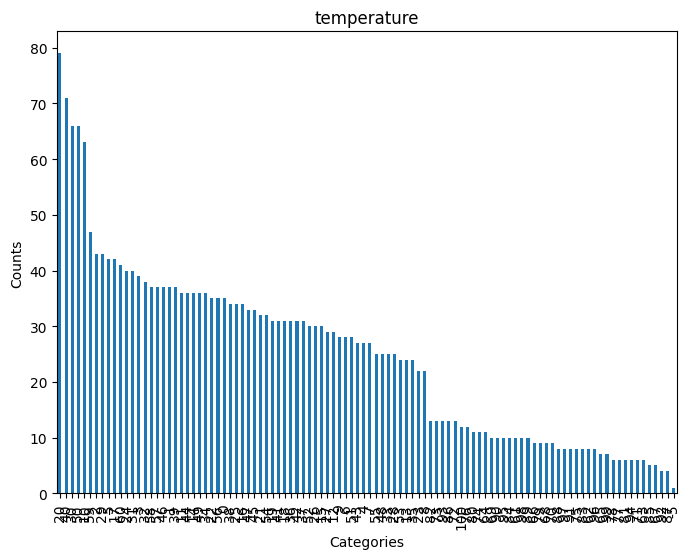

In [129]:
col_to_plot = 'Temperature'
col_count = df_temp[col_to_plot].value_counts()
plt.figure(figsize=(8, 6))
col_count.plot(kind='bar')
plt.title('temperature')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

In [128]:
def classify_temperature(temp_value):
    #very low = 0
    if temp_value >= 0 and temp_value <= 10:
        return '0'
     # low = 1
    elif temp_value > 10 and temp_value <= 20:
        return '1'
    #moderately low = 2
    elif temp_value > 20 and temp_value <=30:
        return '2'
    #slightly low = 3
    elif temp_value >30 and temp_value <= 40:
        return '3'
    #optimal = 4
    elif temp_value > 40 and temp_value <= 50:
        return '4'
    #slightly high = 5
    elif temp_value > 50 and temp_value <= 60:
        return '5'
    #moderately high =6
    else:
        return '6'

In [130]:
df_out['Temperature'] = df_temp['Temperature'].apply(classify_temperature)
#df_out['Temperature'] = df['classified_temperature']
#df.drop(columns=['Temperature_classified'], inplace=True)

df_out.head(20)

,Nitrogen,Phosphorus,Potassium,Temperature
0,2,3,6,1
1,7,0,9,5
2,3,4,6,0
3,5,6,5,5
4,0,3,6,4
5,2,9,1,0
6,7,2,6,5
7,1,9,4,3
8,7,3,9,3
9,3,2,8,0


In [131]:
df_out['Temperature'].count()

2530

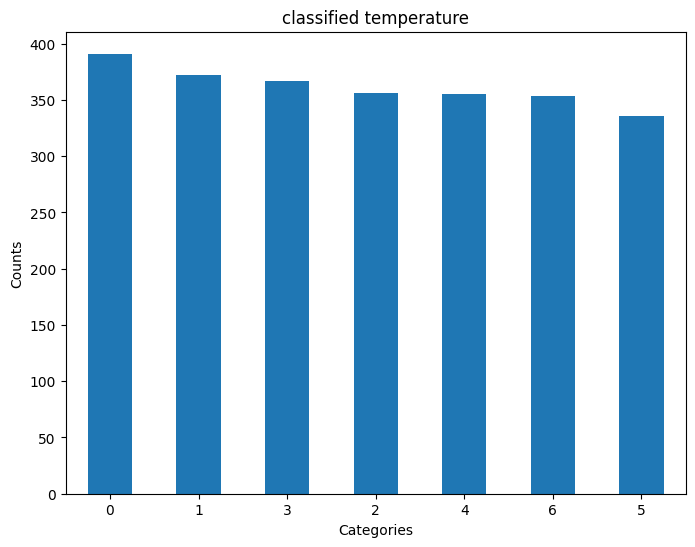

In [132]:
col_to_plot = 'Temperature'
col_count = df_out[col_to_plot].value_counts()
plt.figure(figsize=(8, 6))
col_count.plot(kind='bar')
plt.title('classified temperature')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

In [133]:
def generate_humidity_values(temperature_values):

    return  random.randint(0, 100)

In [134]:

df_temp['Humidity'] = df_temp['Temperature'].apply(generate_humidity_values)

df_temp.head(20)


,Temperature,Humidity
0,14,39
1,59,97
2,1,73
3,53,1
4,41,100
5,10,11
6,57,34
7,36,9
8,40,11
9,4,18


In [135]:

def classify_humidity(hum_val):
    #very low = 0
    if hum_val >= 0 and hum_val <= 20:
        return '0'
     # low = 1
    elif hum_val > 20 and hum_val <= 40:
        return '1'
    #moderately low = 2
    elif hum_val > 40 and hum_val <=60:
        return '2'
    #slightly low = 3
    elif hum_val >60 and hum_val <= 80:
        return '3'
    #optimal = 4
    elif hum_val > 80 and hum_val <= 80:
        return '4'
    #slightly high = 5
    elif hum_val > 80 and hum_val <= 100:
        return '5'
    #moderately high =6
    else:
        return '6'

In [136]:
df_out['Humidity'] = df_temp['Humidity'].apply(classify_humidity)
df_out.head(20)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity
0,2,3,6,1,1
1,7,0,9,5,5
2,3,4,6,0,3
3,5,6,5,5,0
4,0,3,6,4,5
5,2,9,1,0,0
6,7,2,6,5,1
7,1,9,4,3,0
8,7,3,9,3,0
9,3,2,8,0,0


In [137]:
df_out.to_excel(output_file)
df_out.head(20)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity
0,2,3,6,1,1
1,7,0,9,5,5
2,3,4,6,0,3
3,5,6,5,5,0
4,0,3,6,4,5
5,2,9,1,0,0
6,7,2,6,5,1
7,1,9,4,3,0
8,7,3,9,3,0
9,3,2,8,0,0


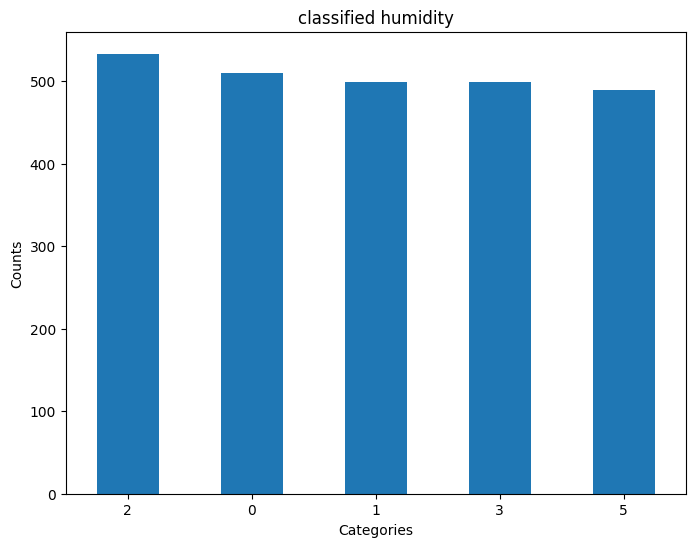

In [138]:
col_to_plot = 'Humidity'
col_count = df_out[col_to_plot].value_counts()
plt.figure(figsize=(8, 6))
col_count.plot(kind='bar')
plt.title('classified humidity')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

In [139]:
def estimate_rain_intensity(temperature, humidity):
    # Define temperature and humidity thresholds
    temp_threshold = 30 
    humidity_threshold = 40

    # If both temperature and humidity exceed their respective thresholds, assume higher probability of rain
    if temperature < temp_threshold and humidity > humidity_threshold:
        #"Very low"
        return 0
    elif temperature < temp_threshold and humidity <= humidity_threshold:
        #"low"
        return 1
    elif temperature >= temp_threshold and humidity > humidity_threshold:
        #"Medium"
        return 2
    elif temperature >= temp_threshold and humidity <= humidity_threshold:
        #"high"
        return 3
    else:
        #very high
        return 4

In [140]:
Rain_intensity = [estimate_rain_intensity(temp, hum) for temp, hum in zip(df_temp['Temperature'], df_temp['Humidity'])]
df_out['rain_intensity'] = Rain_intensity


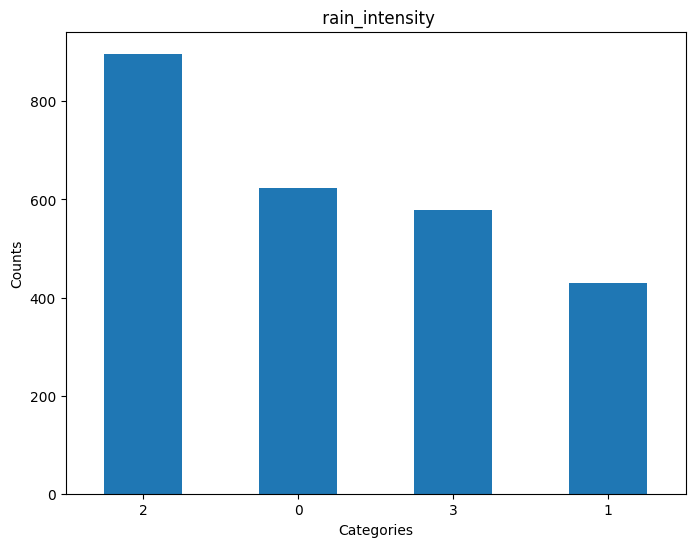

In [141]:
col_to_plot = 'rain_intensity'
col_count = df_out[col_to_plot].value_counts()
plt.figure(figsize=(8, 6))
col_count.plot(kind='bar')
plt.title(' rain_intensity')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

In [142]:

df_out.to_excel(output_file)
df_out.head(20)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,rain_intensity
0,2,3,6,1,1,1
1,7,0,9,5,5,2
2,3,4,6,0,3,0
3,5,6,5,5,0,3
4,0,3,6,4,5,2
5,2,9,1,0,0,1
6,7,2,6,5,1,3
7,1,9,4,3,0,3
8,7,3,9,3,0,3
9,3,2,8,0,0,1


Ideal ranges:
Phosphorus should be: 35 92
Potassium: 216 360
Nitrogen 20 
phosphorus should be the highest at early ages
Nitrogen is very solubale wo we should add extra if it's raining 
if the temperature is high the amount of the three should be increased 


In [ ]:
temperatures = [0, 1, 2, 3, 4, 5, 6]
humidities = [0, 1, 2, 3, 4, 5, 6]
rains = [0, 1, 2, 3, 4]

# Iterate over each combination of temperature, humidity, and rain
for temp in temperatures:
    for hum in humidities:
        for rain in rains:
            
                print("IF TEMPERATURE =", temp, "AND HUMIDITY =", hum, "AND RAIN =", rain)

In [144]:
df_out.head(20)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,rain_intensity
0,2,3,6,1,1,1
1,7,0,9,5,5,2
2,3,4,6,0,3,0
3,5,6,5,5,0,3
4,0,3,6,4,5,2
5,2,9,1,0,0,1
6,7,2,6,5,1,3
7,1,9,4,3,0,3
8,7,3,9,3,0,3
9,3,2,8,0,0,1


In [145]:
def generate_nitrogen_expectation(temp, hum, rain):
   
    if rain==3 and int(temp)<=2 and int(temp)>0:
        return 2
    elif rain==3 and int(temp)>2:
        return 3
    elif int(hum)>=3 and int(temp)<=2 :
        return 2
    elif int(hum)>=3 and int(temp)>2:
        return 3
    else:
        return 1
    

In [146]:
df_out['nitrogen_expectation'] = [generate_nitrogen_expectation(temp, hum,rain) for temp, hum,rain in zip(df_out['Temperature'], df_out['Humidity'], df_out['rain_intensity'])]
print(df_out['nitrogen_expectation'].value_counts())
df_out.to_excel(output_file)

nitrogen_expectation
3    1125
1     963
2     442
Name: count, dtype: int64


In [147]:
df_out.head(20)


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,rain_intensity,nitrogen_expectation
0,2,3,6,1,1,1,1
1,7,0,9,5,5,2,3
2,3,4,6,0,3,0,2
3,5,6,5,5,0,3,3
4,0,3,6,4,5,2,3
5,2,9,1,0,0,1,1
6,7,2,6,5,1,3,3
7,1,9,4,3,0,3,3
8,7,3,9,3,0,3,3
9,3,2,8,0,0,1,1


In [148]:
def generate_phosphorus_expectation(temp, hum, rain):
   
    if rain==3 and int(temp)<=2 and int(temp)>0:
        return random.randint(3,5)
    elif rain==3 and int(temp)>2:
        return random.randint(4,6)
    elif int(hum)>=3 and int(temp)<=2 :
        return  random.randint(3,4)
    elif int(hum)>=3 and int(temp)>2:
        return random.randint(4,5)
    else:
        return   random.randint(3,5)
    

In [149]:
df_out['phosphorus_expectation'] = [generate_phosphorus_expectation(temp, hum,rain) for temp, hum,rain in zip(df_out['Temperature'], df_out['Humidity'], df_out['rain_intensity'])]

df_out.to_excel(output_file)
print(df_out['phosphorus_expectation'].value_counts())


phosphorus_expectation
4    991
5    788
3    564
6    187
Name: count, dtype: int64


In [150]:
df_out.head(20)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,rain_intensity,nitrogen_expectation,phosphorus_expectation
0,2,3,6,1,1,1,1,3
1,7,0,9,5,5,2,3,4
2,3,4,6,0,3,0,2,4
3,5,6,5,5,0,3,3,5
4,0,3,6,4,5,2,3,4
5,2,9,1,0,0,1,1,4
6,7,2,6,5,1,3,3,4
7,1,9,4,3,0,3,3,6
8,7,3,9,3,0,3,3,5
9,3,2,8,0,0,1,1,3


In [152]:
#Potassium: 216 360
def generate_potassium_expectation(temp, hum, rain):
    if int(rain)>=2 and int(temp)<=2 and int(temp)>0:
        return random.randint(5,6)
    elif int(rain)>=2 and int(temp)>2:
        return random.randint(6,9)
    elif int(hum)>=3 and int(temp)<=2 :
        return  random.randint(4,6)
    elif int(hum)>=3 and int(temp)>2:
        return random.randint(6,7)
    else:
        return   random.randint(5,7)

In [153]:
df_out['potassium_expectation'] = [generate_potassium_expectation(temp, hum,rain) for temp, hum,rain in zip(df_out['Temperature'], df_out['Humidity'], df_out['rain_intensity'])]

df_out.to_excel(output_file)
print(df_out['potassium_expectation'].value_counts())

potassium_expectation
6    688
7    642
5    384
9    342
8    341
4    133
Name: count, dtype: int64


In [157]:
def generate_water_expectation(temp,hum,rain):
    if int(rain) >= 3 and int(hum)>= 3:
        return "3"  # Water class between 30 and 40
    else:
        water_score = (int(temp) + int(hum)+ int(rain)) / 3
        if water_score <= 1.5:
            return "1"  # Low
        elif water_score <= 2.5:
            return "2"  # Medium
        elif water_score <= 3.5:
            return "3"  # Slightly high
        elif water_score <= 4.5:
            return "4"  # High
        else:
            return "5"  # Extremely high
        return water_score
    

In [158]:
df_out['water_expectation'] = [generate_water_expectation(temp, hum,rain) for temp, hum,rain in zip(df_out['Temperature'], df_out['Humidity'], df_out['rain_intensity'])]

df_out.to_excel(output_file)
print(df_out['water_expectation'].value_counts())

water_expectation
3    878
1    821
2    559
4    272
Name: count, dtype: int64


In [159]:
df_out.head(20)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,rain_intensity,nitrogen_expectation,phosphorus_expectation,potassium_expectation,water_expectation
0,2,3,6,1,1,1,1,3,7,1
1,7,0,9,5,5,2,3,4,6,4
2,3,4,6,0,3,0,2,4,6,1
3,5,6,5,5,0,3,3,5,8,3
4,0,3,6,4,5,2,3,4,6,4
5,2,9,1,0,0,1,1,4,5,1
6,7,2,6,5,1,3,3,4,9,3
7,1,9,4,3,0,3,3,6,8,2
8,7,3,9,3,0,3,3,5,9,2
9,3,2,8,0,0,1,1,3,6,1
